In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB3
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,GlobalMaxPool2D, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import zipfile
from shutil import copyfile
import matplotlib.image as mpimg
from tensorflow.keras import layers
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report

Mounted at /content/drive


In [ ]:
copyfile("/content/drive/MyDrive/Planets and Moons-20250219T183810Z-001.zip", "archive.zip")

zip = zipfile.ZipFile("archive.zip", "r")
zip.extractall()
zip.close()

In [ ]:
data_dir =  'Planets and Moons'

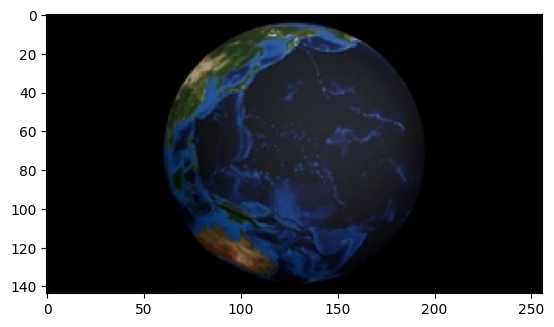

In [ ]:
image = mpimg.imread("Planets and Moons/Earth/Earth (1).jpg")
plt.imshow(image)
plt.show()

In [ ]:
image.shape

(144, 256, 3)

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(data_dir,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.2,
                                                            shuffle=True,
                                                            seed=1)

Found 1638 files belonging to 11 classes.
Using 1311 files for training.


In [ ]:
val_dataset = keras.utils.image_dataset_from_directory(data_dir,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.2,
                                                            shuffle=True,
                                                            seed=1)

Found 1638 files belonging to 11 classes.
Using 327 files for validation.


#Pre-Trained models

In [ ]:
# Loading the EfficientNetB3 model without the final layers
base_model_E = keras.applications.EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
# Blocking the pre-trained weights
base_model_E.trainable = False

# Loading the MobileNetV2 model without the final layers
base_model_M = keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model_M.trainable = False

# Loading the ResNet50 model without the final layers
base_model_R = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model_R.trainable = False

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = base_model_E(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalMaxPooling2D()(x)

x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(11, activation='softmax')(x)

model_E = tf.keras.Model(inputs, outputs)

model_E.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model_E.summary()


history_E = model_E.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 7, 7, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 32)            │         442,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_7               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,247,002 (42.90 MB)

 Trainable params: 463,403 (1.77 MB)

 Non-trainable params: 10,783,599 (41.14 MB)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.3944 - loss: 1.9956 - val_accuracy: 0.9969 - val_loss: 0.0959
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8742 - loss: 0.4672 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9490 - loss: 0.1945 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9617 - loss: 0.1331 - val_accuracy: 1.0000 - val_loss: 5.7734e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9709 - loss: 0.1017 - val_accuracy: 1.0000 - val_loss: 2.8522e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9808 - loss: 0.0754 - val_accuracy: 1.0000 - val_loss: 1.3648e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9790 - loss: 0.0604 - val_accuracy: 1.0000 - val_loss: 6.9106e-05
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9914 - loss: 0.0386 - val_accur

In [ ]:
import os

directory_path = '/content/drive/MyDrive/models'

if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully in Google Drive!")
else:
    print(f"Directory '{directory_path}' already exists in Google Drive.")


model_E.save("/content/drive/MyDrive/models/model_E.keras")
# Save class names
import json
class_names = train_dataset.class_names
with open('/content/drive/MyDrive/models/class_names.json', 'w') as f:
    json.dump(class_names, f)

Directory '/content/drive/MyDrive/models' created successfully in Google Drive!


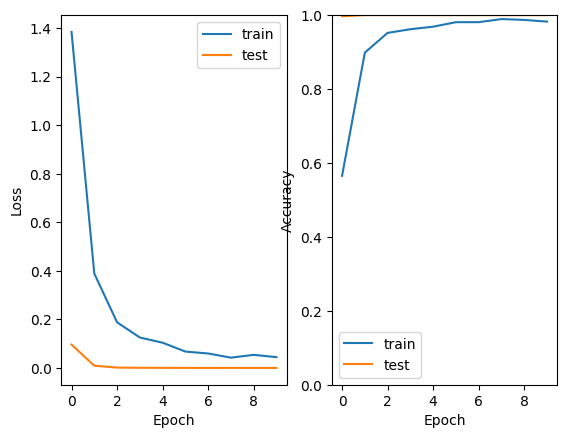

In [ ]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.ylim((0,1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [ ]:

model_E = tf.keras.models.load_model("/content/drive/MyDrive/models/model_E.keras")

score = model_E.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 654ms/step - accuracy: 1.0000 - loss: 3.4312e-05
Test loss: 4.754249312100001e-05
Test accuracy: 1.0


In [ ]:
val_images = []
val_labels = []
for img_batch, lbl_batch in val_dataset.unbatch():
    val_images.append(img_batch.numpy())
    val_labels.append(lbl_batch.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Predictions
predictions = model_E.predict(val_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)
print(classification_report(true_classes, pred_classes))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

print(cm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        38

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327

[[23  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0]
 [ 0

#mobilenet


In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = base_model_M(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalMaxPooling2D()(x)

x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(11, activation='softmax')(x)

model_M = tf.keras.Model(inputs, outputs)


model_M.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model_M.summary()


history_M = model_M.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    steps_per_epoch=len(train_dataset),
    validation_steps=len(val_dataset)
)






Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_11              │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,647,723 (10.10 MB)

 Trainable params: 389,675 (1.49 MB)

 Non-trainable params: 2,258,048 (8.61 MB)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
model_M.save("/content/drive/MyDrive/models/model_M.keras")

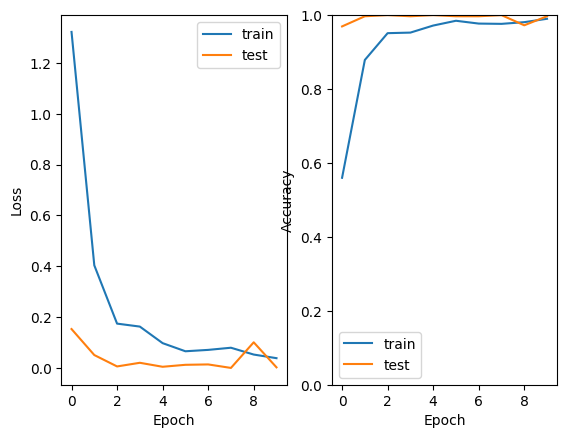

In [ ]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history_M.history['loss'])
plt.plot(history_M.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_M.history['accuracy'])
plt.plot(history_M.history['val_accuracy'])
plt.ylim((0,1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [ ]:
# Evaluation
model_M = tf.keras.models.load_model("/content/drive/MyDrive/models/model_M.keras")

score = model_M.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.9973 - loss: 0.0032
Test loss: 0.0035265644546598196
Test accuracy: 0.9969419240951538


In [ ]:
val_images = []
val_labels = []
for img_batch, lbl_batch in val_dataset.unbatch():
    val_images.append(img_batch.numpy())
    val_labels.append(lbl_batch.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Predictions
predictions = model_M.predict(val_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)
print(classification_report(true_classes, pred_classes))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

print(cm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 923ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        24
           6       1.00      0.96      0.98        27
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        34
           9       0.97      1.00      0.98        32
          10       1.00      1.00      1.00        38

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327

[[23  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0]
 

#resnet

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = base_model_R(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalMaxPooling2D()(x)

x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(11, activation='softmax')(x)

model_R = tf.keras.Model(inputs, outputs)


model_R.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_R.summary()

history_R = model_R.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    steps_per_epoch=len(train_dataset),
    validation_steps=len(val_dataset)
)


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 32)            │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_9               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,198,635 (92.31 MB)

 Trainable params: 610,859 (2.33 MB)

 Non-trainable params: 23,587,776 (89.98 MB)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 379ms/step - accuracy: 0.4122 - loss: 1.7546 - val_accuracy: 1.0000 - val_loss: 0.1118
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8704 - loss: 0.4105 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9412 - loss: 0.1813 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9843 - loss: 0.0864 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9787 - loss: 0.0762 - val_accuracy: 1.0000 - val_loss: 1.0168e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9857 - loss: 0.0447 - val_accuracy: 1.0000 - val_loss: 1.8149e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9856 - loss: 0.0643 - val_accuracy: 1.0000 - val_loss: 4.5700e-05
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9859 - loss: 0.0414 - val

In [ ]:
model_R.save("/content/drive/MyDrive/models/model_R.keras")

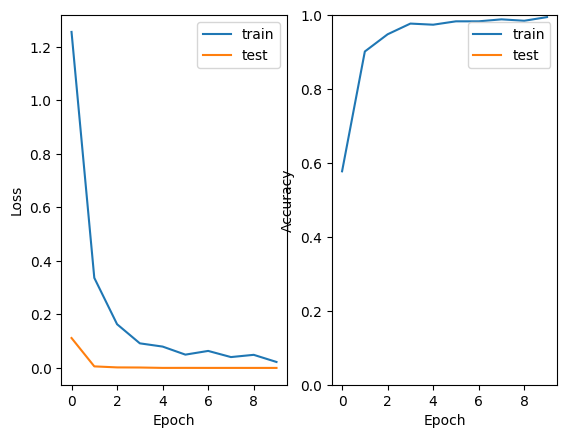

In [ ]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history_R.history['loss'])
plt.plot(history_R.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_R.history['accuracy'])
plt.plot(history_R.history['val_accuracy'])
plt.ylim((0,1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [ ]:
model_R = tf.keras.models.load_model("/content/drive/MyDrive/models/model_R.keras")

score = model_R.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 1.0000 - loss: 5.2681e-06
Test loss: 6.058292001398513e-06
Test accuracy: 1.0


In [ ]:
val_images = []
val_labels = []
for img_batch, lbl_batch in val_dataset.unbatch():
    val_images.append(img_batch.numpy())
    val_labels.append(lbl_batch.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Predictions
predictions = model_R.predict(val_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)
print(classification_report(true_classes, pred_classes))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

print(cm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        38

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327

[[23  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0]
 [ 0

#data augmentation

In [ ]:
base_path = 'Planets and Moons'

In [ ]:
# Introduction of the AUTOTUNE to speed up the training
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

#n DATA AUGMENTATION
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
])

inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model_M(x, training=False)

x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalMaxPooling2D()(x)

x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(11, activation='softmax')(x)

model_D = tf.keras.Model(inputs, outputs)
model_D.summary()

model_D.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # per one-hot
    metrics=['accuracy']
)


EPOCHS = 15
history_D = model_D.fit(
    train_dataset,
    validation_data=val_dataset,

    epochs=EPOCHS
)

# Ricompiliamo con un LR più basso per non “distruggere” i pesi pre-addestrati
model_D.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FINE_TUNING_EPOCHS = 5
history_fine = model_D.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=FINE_TUNING_EPOCHS
)


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 7, 7, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_10              │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,647,723 (10.10 MB)

 Trainable params: 389,675 (1.49 MB)

 Non-trainable params: 2,258,048 (8.61 MB)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.1779 - loss: 2.3932 - val_accuracy: 0.2752 - val_loss: 1.9501
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4197 - loss: 1.6188 - val_accuracy: 0.5474 - val_loss: 1.0787
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5950 - loss: 1.0938 - val_accuracy: 0.6606 - val_loss: 0.7388
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7081 - loss: 0.7680 - val_accuracy: 0.6116 - val_loss: 1.0094
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.7535 - loss: 0.6139 - val_accuracy: 0.5902 - val_loss: 1.1833
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.7939 - loss: 0.5405 - val_accuracy: 0.5688 - val_loss: 1.1297
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8084 - loss: 0.5100 - val_accuracy: 0.6667 - val_loss: 0.8293
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.8395 - loss: 0.4130 - val_accuracy: 0.6575 -

In [ ]:
model_D.save("/content/drive/MyDrive/models/model_D.keras")

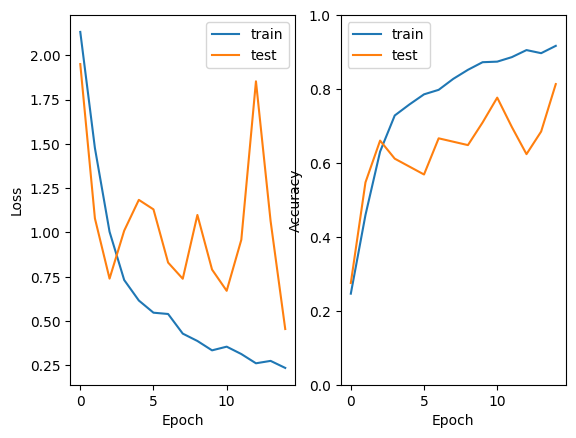

In [ ]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history_D.history['loss'])
plt.plot(history_D.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_D.history['accuracy'])
plt.plot(history_D.history['val_accuracy'])
plt.ylim((0,1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [ ]:
model_D = tf.keras.models.load_model("/content/drive/MyDrive/models/model_D.keras")

# Evaluation
score = model_D.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7436 - loss: 0.8975
Test loss: 0.9544938802719116
Test accuracy: 0.7370030283927917


In [ ]:
val_images = []
val_labels = []
for img_batch, lbl_batch in val_dataset.unbatch():
    val_images.append(img_batch.numpy())
    val_labels.append(lbl_batch.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Predictions
predictions = model_D.predict(val_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)
print(classification_report(true_classes, pred_classes))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

print(cm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step
              precision    recall  f1-score   support

           0       0.94      0.65      0.77        23
           1       0.90      0.93      0.92        30
           2       0.28      1.00      0.44        24
           3       1.00      0.30      0.47        33
           4       1.00      0.97      0.99        35
           5       0.92      1.00      0.96        24
           6       0.70      0.85      0.77        27
           7       1.00      0.63      0.77        27
           8       1.00      1.00      1.00        34
           9       0.95      0.66      0.78        32
          10       0.61      0.29      0.39        38

    accuracy                           0.74       327
   macro avg       0.85      0.75      0.75       327
weighted avg       0.85      0.74      0.75       327

[[15  1  7  0  0  0  0  0  0  0  0]
 [ 0 28  2  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0 17 10  0  0  0  0  0  0  6]
 [

In [ ]:
unique_values, counts = np.unique(val_labels, return_counts=True)
unique_values

array([0., 1.], dtype=float32)

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import json

# Load class names from the JSON file
with open('/content/drive/MyDrive/models/class_names.json', 'r') as f:
    class_names = json.load(f)
model_M = keras.models.load_model("/content/drive/MyDrive/models/model_M.keras")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_path = '/content/Planets and Moons/Venus/Venus (1).jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

print(img_array.shape)

(1, 224, 224, 3)


In [ ]:
prediction = model_M.predict(img_array)
predicted_class = np.argmax(prediction)

print(f"This planet seems to be: {class_names[predicted_class]} but the true value is Venus")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
This planet seems to be: Moon but the true value is Venus
